<a href="https://colab.research.google.com/github/annabeltramini/test/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np 
import tensorflow
import torch 
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical

In [22]:
import numpy as np
###INPUTS AS DESCRIBED
inputs = np.array([[1,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,0,0],
          [0,0,1,0,0,0,0,0],
          [0,0,0,1,0,0,0,0],
          [0,0,0,0,1,0,0,0],
          [0,0,0,0,0,1,0,0],
          [0,0,0,0,0,0,1,0],
          [0,0,0,0,0,0,0,1]])

#ACTIVATION FUNCTION
def sigmoid(x):
    sigm = 1/(1+np.exp(-x))
    return sigm
#Its derivative from back propagation
def sigm_prime(x):
    sigm_prim = x*(1-x) 
    return sigm_prim

#TRAINING FUNCTION
def train(inputs,hidden_num, epochs):
  #Weights and balances start randomly
  weights_i2h = np.random.rand(inputs.shape[1],hidden_num)
  weights_h2o = np.random.rand(hidden_num,inputs.shape[1])

  #Store the error values
  d_Error_plot = list()
  for _ in range(epochs):
    d_Error = list() #error in each epoch
    #extract each row and analyse separately
      #the question is to analyse 8 vectors
    for input in inputs:
      target_output = input #I want to get the same as the input


      #FORWARD 
      #Strength of connection depends on weights
      hidden_input = np.dot(input,weights_i2h)
      hidden_output = sigmoid(hidden_input) #activation function

      #Input for the final layer
      final_input =  np.dot(hidden_output,weights_h2o)
      final_output = sigmoid(final_input) #activation function


      #BACKPROPAGATION
      #This is the error
      delta_kt = target_output - final_output #1x8
      
      #Mean Squared Error often used for this calculations
      d_Error.append(((delta_kt)**2)/2)

      #How much should the weights to the output change?
      delta_output = delta_kt * sigm_prime(final_output)
      delta_hidden = np.dot(delta_output,weights_h2o.T) * sigm_prime(hidden_output)

      #Update the weights
      weights_h2o += np.dot(hidden_output.reshape(hidden_num,1), delta_output.reshape(1,inputs.shape[1]))
      weights_i2h += np.dot(input.reshape(inputs.shape[1],1), delta_hidden.reshape(1,hidden_num))

    #Store the mean squared error of the epoch
    d_Error_plot.append(np.mean(d_Error))
  return weights_i2h, weights_h2o, d_Error_plot

#TRAIN OVER 1000 EPOCHS
weights_i2h, weights_h2o, d_Error_plot = train(inputs,3,1000)

In [18]:
import matplotlib.pyplot as plt

#Create a funciton that only does the forward step
  #this will allow to apply the model to a single vector
def predictor(input):
    hidden_layer = sigmoid(np.dot(input,weights_i2h))
    outputs = sigmoid(np.dot(hidden_layer, weights_h2o))
    return(hidden_layer,outputs)

#get the outputs for all the 8 vectors and store it
outputs_list = []
for i in range(0,len(inputs)):
  hidden_layer, outputs = predictor(inputs[i])
  outputs_list.append(outputs)

#print(inputs[o])
outputs_list = np.array(outputs_list)

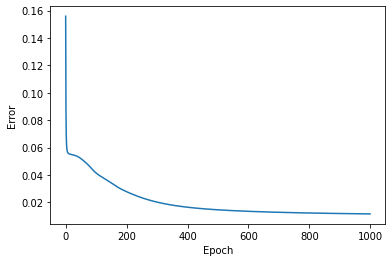

In [19]:
#Plot the mean squared error across epochs
plt.plot(range(1000), d_Error_plot)
plt.xlabel('Epoch')
plt.ylabel('Error')
#plt.show()

fig_dir = './'
fig_ext = '.png'
plt.savefig(os.path.join(fig_dir, 'MLP_10000_error' + fig_ext), dpi=199,
            bbox_inches='tight', pad_inches=0.25) 

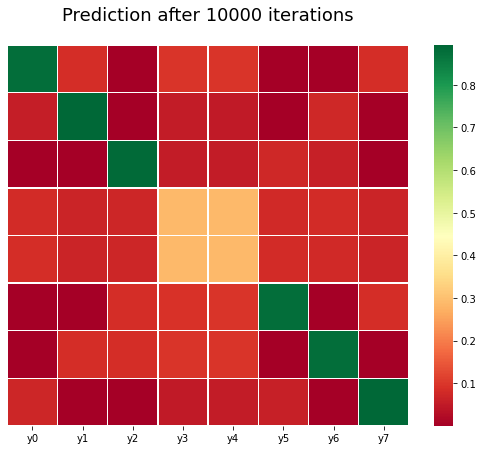

In [23]:
#PLOT THE PREDICTIONS AS HEATMAPS

fig, ax = plt.subplots(figsize=(9,7))
title = "Prediction after 10000 iterations"

plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

x_axis_labels=["y0", "y1", "y2", "y3", "y4","y5","y6","y7"]

sns.heatmap(outputs_list,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax,yticklabels=False, xticklabels=x_axis_labels) 

fig.set_size_inches(9, 7)

fig_dir = './'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'MLP_10000' + fig_ext),
            bbox_inches='tight', pad_inches=0.25) 

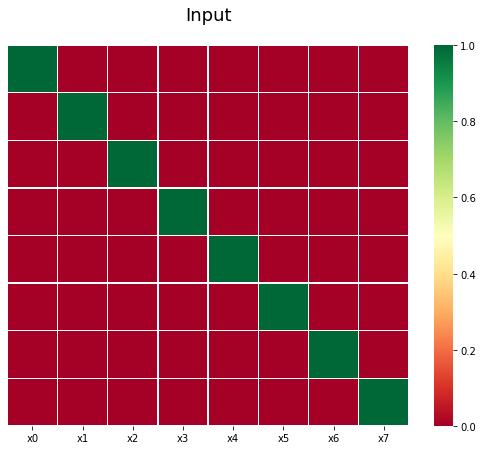

In [24]:
#PLOT INPUT AS HEAT MAP FOR COMPARISON
fig, ax = plt.subplots(figsize=(9,7))
title = "Input"

plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

x_axis_labels=["x0", "x1", "x2", "x3", "x4","x5","x6","x7"]

sns.heatmap(inputs,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax,yticklabels=False, xticklabels=x_axis_labels) 

fig.set_size_inches(9, 7)

fig_dir = './'
fig_ext = '.png'
fig.savefig(os.path.join(fig_dir, 'MLP_input' + fig_ext),
            bbox_inches='tight', pad_inches=0.25) 

### Autoencoder

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


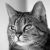

(50, 50)

In [11]:
##IMPORT THE IMAGE YOU WANT TO COMPRESS
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/MyDrive/cat50.jpg")
#plt.plot(img)

# Convert the RGB image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the image to a numpy array
img_np1 = np.array(gray)
img_np1 = img_np1.ravel()
img_np = to_categorical(img_np1, num_classes = 256)
cv2_imshow(gray)
img_np.shape
gray.shape

In [12]:
#CREATE TRAINING DATA FOR THE NETWORK
train_255 = range(0,256)
train_255 = to_categorical(train_255, num_classes = 256)

In [13]:
#TRAIN THE NETWORK ON THE TRAINING DATA FOR 8 BIT IMAGES
weights_i2h, weights_h2o, d_Error_plot = train(train_255,8,5000)

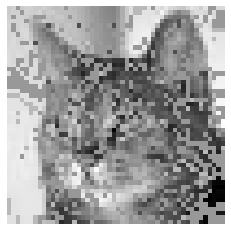

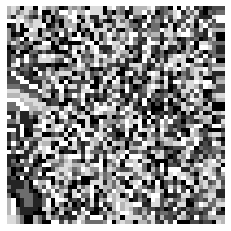

In [16]:
#Initialise variables
hidden_layers = []
outputs_list = []
hidden_pixels = []

#for eahc pixel in the image
for i in img_np:
  #print(i)
  hidden_layer, outputs = predictor(i)
  hidden_layers.append(hidden_layer)
  hidden_pixels.append(np.argmax(hidden_layer)) #most likely intensity
  outputs_list.append(np.argmax(outputs)) #most likely intensity
  
#DISPLAY OUTPUTTED DECODED IMAGE
outputs_list = np.array(outputs_list)
image_predicted = outputs_list.reshape(50,50)
plt.imshow(image_predicted, cmap = "gray")
plt.axis("off")
plt.show()
###print(max(outputs_list))
#print(min(outputs_list))
#print(np.argmax(outputs_list[1]))

#DISPLAY COMPRESSED IMAGE IN THE HIDDEN LAYER
hidden_pixels = np.array(hidden_pixels)/15
image_hidden_predicted = hidden_pixels.reshape(50,50)
#print(hidden_pixels.shape)

plt.imshow(image_hidden_predicted, cmap = "gray")
plt.axis("off")
plt.show()